In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [14]:
data=pd.read_csv('auto-mpg (1).csv')

In [15]:
data.shape

(398, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [17]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
data=data.drop(['car name','origin'],axis=1)

In [19]:
data.isnull().values.any()

np.False_

In [20]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [21]:
data=data.replace('?',np.nan)

In [33]:
#median imputation
m=lambda x:x.fillna(x.median())
data=data.apply(m,axis=0)

In [34]:
data['horsepower']=data['horsepower'].astype('float64')

In [35]:
x=data.drop('mpg',axis=1)
y=data['mpg']

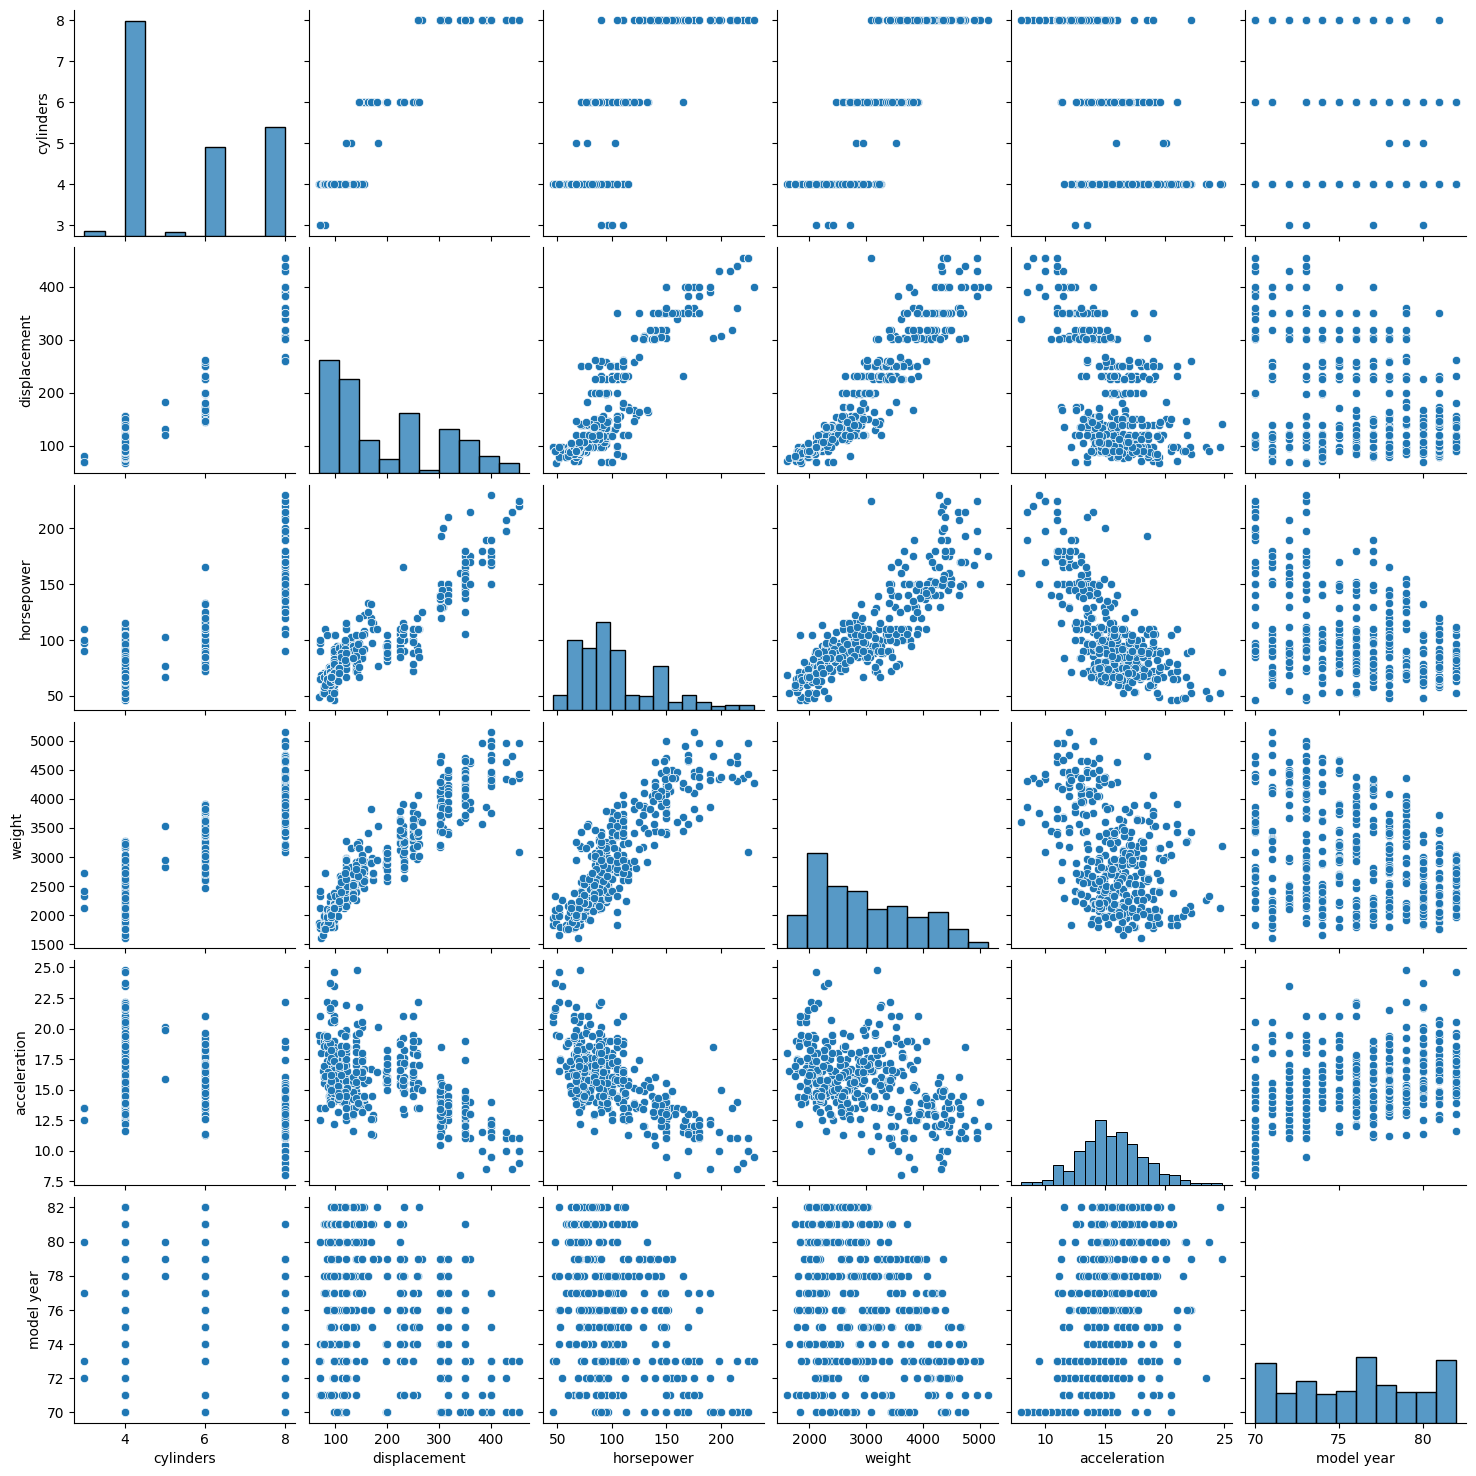

In [36]:
sns.pairplot(x)

In [37]:
#Standardized the data using zscore
from scipy.stats import zscore

In [38]:
x_scaled=x.apply(zscore)

In [39]:
#covariance
cov_matrix=np.cov(x_scaled)

In [40]:
print(cov_matrix)

[[ 1.6902281   1.93412588  1.86135865 ... -0.62338151 -1.36716338
  -1.43501174]
 [ 1.93412588  2.33425902  2.21122966 ... -0.6339268  -1.61000828
  -1.69132936]
 [ 1.86135865  2.21122966  2.11618432 ... -0.55805221 -1.5259534
  -1.61158969]
 ...
 [-0.62338151 -0.6339268  -0.55805221 ...  1.11566446  0.57892768
   0.51036984]
 [-1.36716338 -1.61000828 -1.5259534  ...  0.57892768  1.13686417
   1.18115083]
 [-1.43501174 -1.69132936 -1.61158969 ...  0.51036984  1.18115083
   1.23866925]]


In [41]:
pca=PCA(n_components=6)

In [42]:
pca.fit(x_scaled)

PCA(n_components=6)

In [46]:
print(pca.explained_variance_) #Eigen Values

[4.25994348 0.84071546 0.67496226 0.1377338  0.06548657 0.03627179]


In [47]:
print(pca.components_) #Eigen Vectors

[[ 0.45526182  0.46934018  0.46261026  0.44640084 -0.32468348 -0.23185157]
 [ 0.18219422  0.16027323  0.0151916   0.25624036  0.21010549  0.91163783]
 [ 0.17124425  0.13453195 -0.1247117   0.27173253  0.8676763  -0.3321488 ]
 [ 0.64816936  0.18920163 -0.64431141 -0.3209813  -0.15899017 -0.02520241]
 [-0.30823437  0.00158535 -0.58816921  0.69589394 -0.26606201 -0.06315596]
 [-0.46377301  0.83673991 -0.0955392  -0.27190298  0.03882393  0.01465116]]


Variance explianed


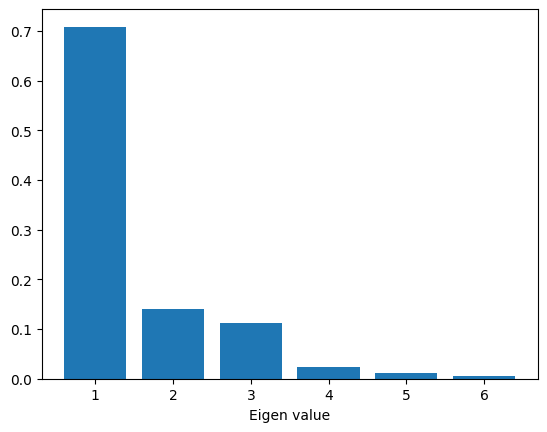

In [50]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_)
print("Variance explianed")
plt.xlabel("Eigen value")
plt.show()

In [56]:
pca3=PCA(n_components=3)

In [57]:
pca3.fit(x_scaled)

PCA(n_components=3)

In [58]:
print(pca3.explained_variance_) #Eigen Values

[4.25994348 0.84071546 0.67496226]


In [59]:
print(pca3.components_) #Eigen Vectors

[[ 0.45526182  0.46934018  0.46261026  0.44640084 -0.32468348 -0.23185157]
 [ 0.18219422  0.16027323  0.0151916   0.25624036  0.21010549  0.91163783]
 [ 0.17124425  0.13453195 -0.1247117   0.27173253  0.8676763  -0.3321488 ]]


In [71]:
xpca=pca3.transform(x_scaled)

Variance explianed


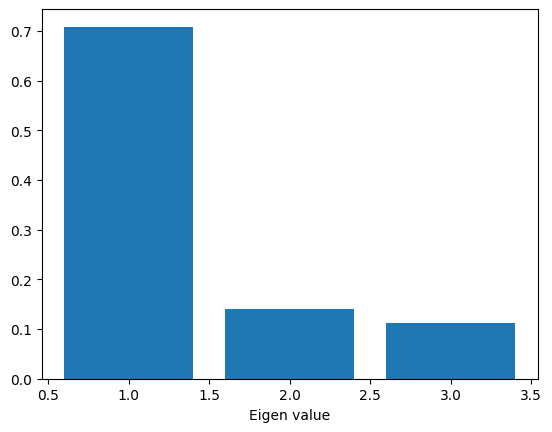

In [72]:
plt.bar(list(range(1,4)),pca3.explained_variance_ratio_)
print("Variance explianed")
plt.xlabel("Eigen value")
plt.show()

In [73]:
regression_model=LinearRegression()

In [74]:
regression_model.fit(x_scaled,y)

LinearRegression()

In [75]:
print("Score:",regression_model.score(x_scaled,y))

Score: 0.8087041327986042


In [76]:
reg_model_pca=LinearRegression()

In [78]:
reg_model_pca.fit(xpca,y)

LinearRegression()

In [81]:
print("Model score after applying pca:",reg_model_pca.score(xpca,y))

Model score after applying pca: 0.7799297329013846
